## Etude du modèle de régression Ridge appliqué au projet GouvImmo =======

#### Introduction : le Modèle Ridge =========================

#### Rappel : La Régression régularisée ===

L'objectif de la régularisation est d'éviter le sur-apprentissage c-à-d apprendre de l'échantillon de données d'apprentissage, mais pas trop (pas de sur-dépendance du modèle).
Pour se faire, le principe est d'accepter une légère augmentation du biais pour obtenir une réduction plus que proportionnelle de la variance.
L'idée est de réguler un peu plus fermement la modélisation en imposant des contraintes sur les coefficients estimés de la régression (contraintes sur les valeurs que pourront prendre les  βi  dans leur ensemble).

On parle ainsi de " shrinkage " (rétrécissement) : on rétrécit les plages de valeurs que peuvent prendre les paramètres estimés.

À la différence de la régression classique, où les variables sont en général conservées telles que mesurées, il est d'usage de centrer et réduire les variables explicatives, pour éviter que les variables à forte variance aient trop d'influence.
En général, la valeur de  βi  dépend de l'échelle de mesure de la variable explicative associée.
Lors du calcul de la norme, afin de ne pas pénaliser ou favoriser un coefficient, il est souhaitable que chaque coefficient soit affecté de manière "semblable". Une manière de réaliser cet équilibre consiste à centrer et réduire toutes les variables.

La variable cible y doit être centrée pour évacuer la constante de la régression (qui ne doit pas être pénalisée), la cible y peut être éventuellement réduite aussi.

#### Régression Ridge ===

#### Import des modules de Base ==========================

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Pour éviter d'avoir les messages warning ---
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Paramètres d'affichage des lignes colonnes des DataFrames ---
pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)
#pd.reset_option('max_columns')
#pd.reset_option('max_rows')

#### Import des modules de base pour Dataviz ================

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import des modules complémentaires  ===================

In [ ]:
import scipy.stats as stats                               # test loi Gaussienne (des résidus) + graph
                                                          # 

#### Import des modules de Machine Learning ================

In [ ]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error            # MSE
from sklearn.metrics import mean_absolute_error           # MAE

#### Chargement des données =============================

In [ ]:
df = pd.read_csv('IDF_2019_to_2021_v3.csv')

#### Visualisation rapide et premières analyses ================

In [ ]:
df.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien
0,2019-1135463,310000.0,2019-01-03,1.0,Vente,11.0,NaN,RUE DE LA FONTAINE,0650,77220.0,77215,Gretz-Armainvilliers,77,772150000B0473,0,101.0,4.0,855.0,2.740574,48.739669,0,0,1,0,1,3069.31,772150000B,3646.883495,3474.511880,2019,0,Maison
1,2019-1135466,155000.0,2019-01-04,1.0,Vente,4.0,NaN,AV DE LA GARE,0600,77340.0,77373,Pontault-Combault,77,77373000AD0157,2,51.0,2.0,0.0,2.616840,48.805639,1,1,0,0,0,3039.22,77373000AD,3804.018010,3759.720085,2019,0,Appartement
2,2019-1135467,165500.0,2019-01-09,1.0,Vente,45.0,NaN,RUE LOUIS VICTOR DE BROGLIE,1413,77176.0,77445,Savigny-le-Temple,77,77445000YA0444,3,64.0,3.0,12.0,2.565832,48.605740,1,2,0,0,0,2585.94,77445000YA,2821.665116,2610.471778,2019,0,Appartement
3,2019-1135468,269000.0,2019-01-02,1.0,Vente,6.0,NaN,RUE JEAN FERRAT,0492,77310.0,77407,Saint-Fargeau-Ponthierry,77,77407000AY0353,0,84.0,4.0,270.0,2.553743,48.530118,0,0,1,0,2,3202.38,77407000AY,2815.332174,2679.428891,2019,0,Maison
4,2019-1135469,199500.0,2019-01-08,1.0,Vente,3.0,NaN,RUE DE LA PICARDIE,0186,77720.0,77211,Grandpuits-Bailly-Carrois,77,772110170D0147,0,109.0,5.0,1036.0,2.993174,48.576719,0,0,1,0,2,1830.28,772110170D,2360.692500,2020.605714,2019,0,Maison


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364462 entries, 0 to 364461
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_mutation                364462 non-null  object 
 1   valeur_fonciere            364462 non-null  float64
 2   date_mutation              364462 non-null  object 
 3   numero_disposition         364462 non-null  float64
 4   nature_mutation            364462 non-null  object 
 5   adresse_numero             356391 non-null  float64
 6   adresse_suffixe            23783 non-null   object 
 7   adresse_nom_voie           364460 non-null  object 
 8   adresse_code_voie          364462 non-null  object 
 9   code_postal                364462 non-null  float64
 10  code_commune               364462 non-null  int64  
 11  nom_commune                364462 non-null  object 
 12  code_departement           364462 non-null  int64  
 13  id_parcelle                36

In [ ]:
df.describe()

,valeur_fonciere,numero_disposition,adresse_numero,code_postal,code_commune,code_departement,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee
count,3.644620e+05,364462.000000,356391.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,363029.000000,363029.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000,364462.000000
mean,3.478103e+05,1.006308,115.268071,85930.144912,85847.920645,85.658938,1.646051,66.647889,3.072853,121.248391,2.353266,48.833724,0.703544,0.435280,0.276259,0.020197,0.056088,5494.212873,5496.119868,5495.470571,2019.721505,0.721505
std,2.900089e+05,0.084307,810.758278,8421.372260,8323.324014,8.348542,1.312962,36.085938,1.473544,260.193369,0.221955,0.135256,0.456695,0.605614,0.447147,0.140673,0.269360,3516.215518,3197.882449,2985.610530,0.736604,0.736604
min,5.000000e+02,1.000000,1.000000,75001.000000,75101.000000,75.000000,0.000000,0.000000,0.000000,0.000000,1.453111,48.133571,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,74.986667,134.490000,2019.000000,0.000000
25%,1.773562e+05,1.000000,7.000000,77230.000000,77243.000000,77.000000,0.000000,42.000000,2.000000,0.000000,2.248844,48.789705,0.000000,0.000000,0.000000,0.000000,0.000000,2983.330000,3154.358889,3235.304934,2019.000000,0.000000
50%,2.679000e+05,1.000000,19.000000,91330.000000,91377.000000,91.000000,2.000000,63.000000,3.000000,0.000000,2.343255,48.853184,1.000000,0.000000,0.000000,0.000000,0.000000,4258.060000,4157.915217,4043.461197,2020.000000,1.000000
75%,4.070000e+05,1.000000,47.000000,93370.000000,93062.000000,93.000000,2.000000,85.000000,4.000000,126.000000,2.462535,48.905161,1.000000,1.000000,1.000000,0.000000,0.000000,7500.000000,7458.166400,7158.064810,2020.000000,1.000000
max,3.000000e+06,5.000000,9999.000000,95880.000000,95690.000000,95.000000,27.000000,300.000000,12.000000,2992.000000,3.517575,49.216561,1.000000,2.000000,1.000000,1.000000,2.000000,25000.000000,77792.205625,14296.052839,2021.000000,2.000000


#### Vérification/traitement des Nan et Doublons ==============

In [ ]:
df.isna().sum()

id_mutation                       0
valeur_fonciere                   0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
adresse_numero                 8071
adresse_suffixe              340679
adresse_nom_voie                  2
adresse_code_voie                 0
code_postal                       0
code_commune                      0
nom_commune                       0
code_departement                  0
id_parcelle                       0
nombre_lots                       0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain                   0
longitude                      1433
latitude                       1433
Appartement                       0
Dépendance                        0
Maison                            0
terrains_a_batir                  0
terrains_autre                    0
prix_m²                           0
section_cadastrale                0
prix_m²_moy_ca              

In [ ]:
# Transformation de la section_cadastrale : encodage des 2 lettres + type 'int'

conv = {'A':'00','B':'01','C':'02','D':'03','E':'04','F':'05','G':'06','H':'07','I':'08','J':'09',
        'K':'10','L':'11','M':'12','N':'13','O':'14','P':'15','Q':'16','R':'17','S':'18','T':'19',
        'U':'20','V':'21','W':'22','X':'23','Y':'24','Z':'25','0':'00'}
df['section_cadastrale'] = df['section_cadastrale'].apply(lambda x: x[0:8] + conv[x[8]] + conv[x[9]])

df['section_cadastrale'] = df['section_cadastrale'].astype('int')

In [ ]:
#df.head()

#### Nota : Les autres données possédant des Nan ne sont pas traitées car non utilisées ultérieurement...

In [ ]:
df.duplicated().sum()

0

#### Traitement des données non numériques =================

In [ ]:
# Suppression des lignes avec latitude / longitude à Nan =========

print('Nbr de lignes sans lat/lon Nan :', len(df[(df['latitude'].notna() & df['longitude'].notna())]))

df = df[(df['latitude'].notna() & df['longitude'].notna())]

Nbr de lignes sans lat/lon Nan : 363029


In [ ]:
#df.head()

#### Sélection des colonnes ===============================

#### Nous ne conservons pas les prix au m2 calculés lors de la DataViz, car ils induiraient un biai
#### par leur expression issue de valeur fonciere et surface reelle bati
#### Nous ne conservons pas non plus le nombre lots qui est une information purement administrative
#### et qui par le jeu des regroupements de lignes opéré sur le dataset ne peut plus être considéré comme fiable

#### Nous créons 4 variables pour la gestion des colonnes utilisées

In [ ]:
# col = df.columns

col_cibl = ['valeur_fonciere']

col_qual = ['Maison', 'Appartement', 'terrains_a_batir',
            'code_departement', 'code_commune', 'section_cadastrale',
            'Dépendance', 'terrains_autre',
            'code_annee']

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
#            'prix_m²', 'prix_m²_moy_ca', 'prix_m²_moy_co',
            'latitude', 'longitude',
#            'nombre_lots',
            'surface_terrain',]

col_util = col_cibl + col_qual + col_quan

#### Si besoin, rappel des principaux graphiques de DataViz =====

#### Distributions des différentes variables ===================

In [ ]:
# type str pour DataViz des var catégorielles

df[col_cibl] = df[col_cibl].astype('float')
df[col_qual] = df[col_qual].astype('str')
df[col_quan] = df[col_quan].astype('float')

In [ ]:
# variable cible quantitative (continue)

sns.displot(df[col_cibl], height=5, aspect=3);

In [ ]:
# variables explicatives qualitatives (discrêtes) 

for i in col_qual:
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    sns.countplot(df[i], ax=ax);

In [ ]:
# variables explicatives quantitatives (continues)

for i in col_quan:
    sns.displot(df[i], height=5, aspect=3);

#### Boxplot des différentes variables =======================

In [ ]:
# variable cible quantitative (continue)

sns.boxplot(y=df[col_cibl].values)
plt.title(col_cibl);

In [ ]:
# variables explicatives quantitatives (continues)

for i in col_quan:
    fig,ax = plt.subplots(1,1,figsize=(6,5))
    sns.boxplot(y=df[i].values, ax=ax)
    plt.title(i);

#### Analyse des relations entre toutes les variables ============

In [ ]:
# type 'int' pour l'analyse des var catégorielles =======

df[col_cibl] = df[col_cibl].astype('float')
df[col_qual] = df[col_qual].astype('int')
df[col_quan] = df[col_quan].astype('float')

In [ ]:
# Matrice de corrélations

plt.figure(figsize=(20, 20))
sns.heatmap(df[col_util].corr(), annot=True, cmap='coolwarm');

In [ ]:
# Relations entre les différentes variables

sns.pairplot(df[col_util]);

### Tests du modèle Ridge ========================

#### Définition de la fonction de test du modèle Ridge ==========

#### Nous créons une fonction d'évaluation des différents types de modèle de régression Ridge
#### paramètres : 
####    - le DataFrame, la colonne "target", les colonnes "features", l'activation du StandardScaler, du PolynomialFeatures + ordre
#### le choix du modèle Ridge à utiliser se fait manuellement par la gestion des commentaires
#### idem pour le choix des valeurs retournées en sortie de fonction :
####     -       version d'évaluation / comparaison entre les différentes applications
####     -       version d'analyse détaillée des résultats

In [ ]:
def eval_ridge(df, col_cibl, col_util, std=False, poly=False, ordre=2):

# Séparation des variables explicatibles et de la variable cible ===
    # La variable cible
    target = df[col_cibl]
    # Selection des colonnes utiles
    data = df[col_util]
    # Suppression de la variable cible
    data.drop(col_cibl, axis=1, inplace=True)
    
# Séparation jeux d'entrainement et de test =============
    # 20% pour le jeu de test, random_state=256 personnel !
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=256)

# Scaler Standard (pour rester en df) ===================
    if std==True:
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train[X_train.columns] = pd.DataFrame(scaler.transform(X_train), index=X_train.index)
        X_test[X_test.columns] = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
    
# Scaler Polynomial (ordre x) ==========================
    if poly==True:
        scaler = preprocessing.PolynomialFeatures(ordre).fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
# Modèle(s) Ridge ======================================
    
# CV pour déterminer le meilleur alpha ---
#    alphas = np.arange(0.1,2.1,0.1)
#    ridge_0 = RidgeCV(alphas=alphas)
#    ridge_0.fit(X_train, y_train)
#    print("best alpha :", ridge_0.alpha_)    

# GridSearchCV pour déterminer tous les meilleurs paramètres ---
#    ridge_00 = Ridge()
#    alphas = np.arange(0.1,2.1,0.1)
#    param = {'alpha':alphas, 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
#    ridge_0 = GridSearchCV(estimator=ridge_00, param_grid=param)
#    ridge_0.fit(X_train, y_train)
#    print("best param :", ridge_0.best_params_)

# Modèle Ridge "simple" ---
    alphas = [0.1]
    ridge_0 = Ridge(alpha=alphas, random_state=256)
    ridge_0.fit(X_train, y_train)    
    print("alpha :", alphas)    

    ridge_0_pred_train = ridge_0.predict(X_train)
    ridge_0_pred_test = ridge_0.predict(X_test)

# Calculs des scores ==================================== 
    score_train = ridge_0.score(X_train, y_train)
    score_test = ridge_0.score(X_test, y_test)
    mae_train = mean_absolute_error(ridge_0_pred_train, y_train)
    mae_test = mean_absolute_error(ridge_0_pred_test, y_test)     
    
# Visualisation des scores après Regression =============
    print()
    print('score (R2) train :', score_train)
    print('score (R2) test :', score_test)
    print('MAE train :', mae_test)
    print('MAE test :', mae_test)    
#    print('RMSE train :', np.sqrt(mean_squared_error(ridge_0_pred_train, y_train)))
#    print('RMSE test :', np.sqrt(mean_squared_error(ridge_0_pred_test, y_test)))
    
# Coefficients Ridge appliqués à chaque variable explicative ===
    if ((poly==True) & ((len(alphas)==1)==True)):
        print("Dimension du tab de coef. : ",ridge_0.coef_.shape)
#        print(ridge_0.coef_)
    elif ((poly==False) & ((len(alphas)==1)==True)):
        coef_ridge = pd.DataFrame({"coef_ridge": ridge_0.coef_[0,:]}, index=list(data.columns)).sort_values(by="coef_ridge", ascending=False)
#        print(coef_ridge)
        plt.figure(figsize=(15,5))
        sns.barplot(x=coef_ridge['coef_ridge'],y=coef_ridge.index);

# Sortie(s) de fonction =================================
    return ridge_0, score_train, score_test, mae_train, mae_test      # retour modeleur + score test + MAE test
#    return ridge_0, X_train, y_train, ridge_0_pred_train              # retour modeleur + données X + y train


In [ ]:
# type 'int' pour le traitement des var catégorielles ====
# au cas où, le Rappel de DataViz ne soit pas executé...

df[col_cibl] = df[col_cibl].astype('float')
df[col_qual] = df[col_qual].astype('int')
df[col_quan] = df[col_quan].astype('float')

#### Iteration 1 : dataset presque complet (hors prix au m2, nb lots) ====

#### Sélection des colonnes ===============================

In [ ]:
# col = df.columns

col_cibl = ['valeur_fonciere']

col_qual = ['Maison', 'Appartement', 'terrains_a_batir',
            'code_departement', 'code_commune', 'section_cadastrale',
            'Dépendance', 'terrains_autre',
            'code_annee']

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_qual + col_quan

#### Appel de la fonction d'evaluation du modèle Ridge CV ======

In [ ]:
# Attention à bien activer les bonnes lignes avant execution !!

ridge_1 = eval_ridge(df,col_cibl,col_util,False,False,2)

best alpha : 0.7000000000000001

score (R2) train : -3.703286016630038e+26
score (R2) test : -3.7332182226595886e+26
MAE train : 5.468145801016371e+18
MAE test : 5.468145801016371e+18


#### Nota : alpha = 0.7 mais surtout résultats peu probants...

#### Appel de la fonction d'evaluation du modèle Ridge via GSCV ===

In [ ]:
# Attention à bien activer les bonnes lignes avant execution !!

ridge_1 = eval_ridge(df,col_cibl,col_util,False,False,2)

best param : {'alpha': 0.1, 'solver': 'auto'}
best estimator : Ridge(alpha=0.1)

score (R2) train : 0.4377298949689079
score (R2) test : 0.43330410915338213
MAE train : 145476.44306579084
MAE test : 145476.44306579084


#### Nota : nous retiendrons alpha = 0.1 pour la suite de l'étude...
#### le solver 'auto' est le solver par défaut

#### Appel de la fonction d'eval Ridge alpha 0.1 ===============

In [ ]:
# Attention à bien activer les bonnes lignes avant execution !!

ridge_1, score_train, score_test, mae_train, mae_test = eval_ridge(df,col_cibl,col_util,False,False,2)

NameError: ignored

#### Nota : Sans Standardisation, les variables sur le type de bien ou la localisation portent les + forts coef...
#### seuls les Appartements semblent en retrait (?) (peut-être parce que plus nombreux que les maisons ou terrains)
#### L'itération 1 nous a permis d'obtenir les hyper-paramètres et la valeur du score de référence

In [ ]:
# Initialisation des 4 listes de résultats

list_score_train = []
list_score_test  = []
list_mae_train   = []
list_mae_test    = []

In [ ]:
# Ajout des résultats de l'itération i aux 4 listes

list_score_train.append(score_train)
list_score_test.append(score_test)
list_mae_train.append(mae_train)
list_mae_test.append(mae_train)

#### Iteration 2 : dataset presque complet avec scaler std =======

alpha : [0.1]

score (R2) train : 0.43758843403405157
score (R2) test : 0.43313692100764556
MAE train : 145487.96665443675
MAE test : 145487.96665443675


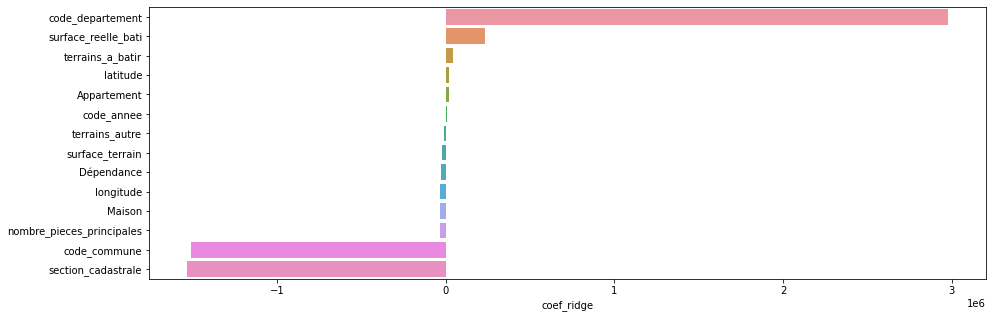

In [ ]:
# Appel de la fonction d'eval Ridge

ridge_2, score_train, score_test, mae_train, mae_test = eval_ridge(df,col_cibl,col_util,True,False,2)

#### Nota : Avec la Standardisation, nous voyons apparaitre la prépondérance des codes localisation...
#### Est-ce lié aux valeurs initiales elles-mêmes, non encodées (?)
#### nous étudierons plus loin, l'importance des différentes variables métier...

In [ ]:
# Ajout des résultats de l'itération i aux 4 listes

list_score_train.append(score_train)
list_score_test.append(score_test)
list_mae_train.append(mae_train)
list_mae_test.append(mae_train)

#### Iteration 3 : dataset presque complet avec scaler poly ordre 2 ===

In [ ]:
# Appel de la fonction d'eval Ridge

ridge_3, score_train, score_test, mae_train, mae_test = eval_ridge(df,col_cibl,col_util,False,True,2)

alpha : [0.1]

score (R2) train : 0.3231146879071084
score (R2) test : 0.3197377028797074
MAE train : 161244.2413749762
MAE test : 161244.2413749762
Dimension du tab de coef. :  (1, 120)


#### Nota : la mise à l'échelle par la seule fonction polynomiale, n'est pas performante...
#### il faut d'abord appliquer une Standardisation...

In [ ]:
# Ajout des résultats de l'itération i aux 4 listes

list_score_train.append(score_train)
list_score_test.append(score_test)
list_mae_train.append(mae_train)
list_mae_test.append(mae_train)

#### Iteration 4 : dataset presque complet avec scaler std + poly ordre 2 ====

In [ ]:
# Appel de la fonction d'eval Ridge

ridge_4, score_train, score_test, mae_train, mae_test = eval_ridge(df,col_cibl,col_util,True,True,2)

alpha : [0.1]

score (R2) train : 0.6292617463494659
score (R2) test : 0.6285621282447307
MAE train : 113408.96621755246
MAE test : 113408.96621755246
Dimension du tab de coef. :  (1, 120)


#### Nota : la combinaison des 2 mises à l'échelle apporte un net progrès...

In [ ]:
# Ajout des résultats de l'itération i aux 4 listes

list_score_train.append(score_train)
list_score_test.append(score_test)
list_mae_train.append(mae_train)
list_mae_test.append(mae_train)

#### Iteration 5 : dataset presque complet avec scaler std + poly ordre 3 ===

In [ ]:
# Appel de la fonction d'eval Ridge

ridge_5, score_train, score_test, mae_train, mae_test = eval_ridge(df,col_cibl,col_util,True,True,3)

alpha : [0.1]

score (R2) train : 0.7166751539986782
score (R2) test : 0.71560539956566
MAE train : 95256.77113367787
MAE test : 95256.77113367787
Dimension du tab de coef. :  (1, 680)


#### Nota : nouvelle petite amélioration des résultats...
#### nous poursuivons dans cette direction (ordre 4)

In [ ]:
# Ajout des résultats de l'itération i aux 4 listes

list_score_train.append(score_train)
list_score_test.append(score_test)
list_mae_train.append(mae_train)
list_mae_test.append(mae_train)

#### Iteration 6 : dataset presque complet avec scaler std + poly ordre 4 ===

In [ ]:
# Appel de la fonction d'eval Ridge

ridge_6, score_train, score_test, mae_train, mae_test = eval_ridge(df,col_cibl,col_util,True,True,4)

alpha : [0.1]

score (R2) train : 0.7588897976860207
score (R2) test : 0.7443999550143504
MAE train : 85362.86740742573
MAE test : 85362.86740742573
Dimension du tab de coef. :  (1, 3060)


#### Nota : encore une petite amélioration, mais le temps de calcul commence à devenir long...
#### et le nb de coef. très important

In [ ]:
# Ajout des résultats de l'itération i aux 4 listes

list_score_train.append(score_train)
list_score_test.append(score_test)
list_mae_train.append(mae_train)
list_mae_test.append(mae_train)

#### Encodage des varirables de localisation ==================

#### Afin de supprimer d'éventuelles erreurs induites par les valeurs importantes des codes de localisation,
#### nous allons encoder progressivement ces dernières...
#### Compte tenu du nombre très important de communes et de sections cadastrales nous commençons
#### par le code département...

In [ ]:
# uniquement encodage du code_departement

df['code_departement'] = df['code_departement'].astype('object')
df2 = df.join(pd.get_dummies(df['code_departement'], prefix='dep').astype('int'))
df2.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_94,dep_95
0,2019-1135463,310000.0,2019-01-03,1.0,Vente,11.0,NaN,RUE DE LA FONTAINE,0650,77220.0,77215,Gretz-Armainvilliers,77,772150000B0473,0,101.0,4.0,855.0,2.740574,48.739669,0,0,1,0,1,3069.31,772150000001,3646.883495,3474.511880,2019,0,Maison,0,1,0,0,0,0,0,0
1,2019-1135466,155000.0,2019-01-04,1.0,Vente,4.0,NaN,AV DE LA GARE,0600,77340.0,77373,Pontault-Combault,77,77373000AD0157,2,51.0,2.0,0.0,2.616840,48.805639,1,1,0,0,0,3039.22,773730000003,3804.018010,3759.720085,2019,0,Appartement,0,1,0,0,0,0,0,0
2,2019-1135467,165500.0,2019-01-09,1.0,Vente,45.0,NaN,RUE LOUIS VICTOR DE BROGLIE,1413,77176.0,77445,Savigny-le-Temple,77,77445000YA0444,3,64.0,3.0,12.0,2.565832,48.605740,1,2,0,0,0,2585.94,774450002400,2821.665116,2610.471778,2019,0,Appartement,0,1,0,0,0,0,0,0
3,2019-1135468,269000.0,2019-01-02,1.0,Vente,6.0,NaN,RUE JEAN FERRAT,0492,77310.0,77407,Saint-Fargeau-Ponthierry,77,77407000AY0353,0,84.0,4.0,270.0,2.553743,48.530118,0,0,1,0,2,3202.38,774070000024,2815.332174,2679.428891,2019,0,Maison,0,1,0,0,0,0,0,0
4,2019-1135469,199500.0,2019-01-08,1.0,Vente,3.0,NaN,RUE DE LA PICARDIE,0186,77720.0,77211,Grandpuits-Bailly-Carrois,77,772110170D0147,0,109.0,5.0,1036.0,2.993174,48.576719,0,0,1,0,2,1830.28,772110170003,2360.692500,2020.605714,2019,0,Maison,0,1,0,0,0,0,0,0


In [ ]:
df2.shape

(363029, 40)

#### Iteration 7 : dataset presque complet avec scaler std + poly ordre 3 + encodage dep ===

In [ ]:
# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

# suppression de la colonne code_departement et ajout des colonnes spécifiques
col_qual = ['Maison', 'Appartement', 'terrains_a_batir',
            'dep_75','dep_77','dep_78','dep_91','dep_92','dep_93','dep_94','dep_95',
            'code_commune', 'section_cadastrale',
            'Dépendance', 'terrains_autre',
            'code_annee']

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_qual + col_quan

# Appel de la fonction d'eval Ridge

ridge_7, score_train, score_test, mae_train, mae_test = eval_ridge(df2,col_cibl,col_util,True,True,3)

alpha : [0.1]

score (R2) train : 0.8043412523413288
score (R2) test : 0.78822738198303
MAE train : 72916.757617968
MAE test : 72916.757617968
Dimension du tab de coef. :  (1, 2024)


#### Nota : nouveau progrès grace à l'encodage du code département...
#### malgré un ordre 3 ald 4 pour conserver un temps de réponse correct

In [ ]:
# Ajout des résultats de l'itération i aux 4 listes

list_score_train.append(score_train)
list_score_test.append(score_test)
list_mae_train.append(mae_train)
list_mae_test.append(mae_train)

#### Poursuite des encodages =============================

In [ ]:
# uniquement encodage du code_departement + code_commune

df['code_departement'] = df['code_departement'].astype('object')
df['code_commune'] = df['code_commune'].astype('object')
df3 = df.join(pd.get_dummies(df[['code_departement','code_commune']], prefix=['dep','com']).astype('int'))
df3.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_94,dep_95,com_75101,com_75102,com_75103,com_75104,com_75105,com_75106,com_75107,com_75108,com_75109,com_75110,com_75111,com_75112,com_75113,com_75114,com_75115,com_75116,com_75117,com_75118,com_75119,com_75120,com_77001,com_77002,com_77003,com_77004,com_77005,com_77006,com_77007,com_77008,com_77009,com_77010,com_77011,com_77012,com_77013,com_77014,com_77015,com_77016,com_77018,com_77019,com_77020,com_77021,com_77022,com_77023,com_77024,com_77025,com_77026,com_77027,com_77029,com_77030,com_77031,com_77032,com_77034,com_77035,com_77036,com_77037,com_77038,com_77039,com_77040,com_77041,com_77042,com_77043,com_77044,com_77045,com_77046,com_77047,com_77048,com_77049,com_77050,com_77051,com_77052,com_77053,com_77054,com_77055,com_77056,com_77057,com_77058,com_77059,com_77060,com_77061,com_77062,com_77063,com_77065,com_77066,com_77067,com_77068,com_77069,com_77070,com_77071,com_77072,com_77073,com_77075,com_77076,com_77077,com_77078,com_77079,com_77080,com_77081,com_77082,com_77083,com_77084,com_77085,com_77086,com_77087,com_77088,com_77089,com_77090,com_77091,com_77093,com_77094,com_77095,com_77096,com_77097,com_77098,com_77099,com_77100,com_77101,com_77102,com_77103,com_77104,com_77106,com_77107,com_77108,com_77109,com_77110,com_77111,com_77112,com_77113,com_77114,com_77115,com_77116,com_77117,com_77118,com_77119,com_77120,com_77121,com_77122,com_77123,com_77124,com_77125,com_77126,com_77127,com_77128,com_77129,com_77130,com_77131,com_77132,com_77133,com_77134,com_77135,com_77136,com_77137,com_77138,com_77139,com_77140,com_77141,com_77142,com_77143,com_77144,com_77145,com_77146,com_77147,com_77148,com_77150,com_77151,com_77152,com_77153,com_77154,com_77155,com_77156,com_77157,com_77158,com_77159,com_77161,com_77162,com_77163,com_77164,com_77165,com_77167,com_77168,com_77169,com_77171,com_77172,com_77173,com_77174,com_77175,com_77176,com_77177,com_77178,com_77179,com_77180,com_77181,com_77182,com_77183,com_77184,com_77185,com_77186,com_77187,com_77188,com_77190,com_77191,com_77192,com_77193,com_77194,com_77195,com_77196,com_77197,com_77198,com_77199,com_77200,com_77201,com_77202,com_77203,com_77204,com_77205,com_77206,com_77207,com_77208,com_77209,com_77210,com_77211,com_77212,com_77214,com_77215,com_77216,com_77217,com_77218,com_77219,com_77220,com_77221,com_77222,com_77223,com_77224,com_77225,com_77226,com_77227,com_77228,com_77229,com_77230,com_77231,com_77232,com_77233,com_77234,com_77235,com_77236,com_77237,com_77238,com_77239,com_77240,com_77241,com_77242,com_77243,com_77244,com_77245,com_77246,com_77247,com_77248,com_77249,com_77251,com_77252,com_77253,com_77254,com_77255,com_77256,com_77257,com_77258,com_77259,com_77260,com_77261,com_77262,com_77263,com_77264,com_77265,com_77266,com_77267,com_77268,com_77269,com_77270,com_77271,com_77272,com_77273,com_77274,com_77275,com_77276,com_77277,com_77278,com_77279,com_77280,com_77281,com_77282,com_77283,com_77284,com_77285,com_77286,com_77287,com_77288,com_77289,com_77290,com_77291,com_77292,com_77293,com_77294,com_77295,com_77296,com_77297,com_77298,com_77300,com_77301,com_77302,com_77303,com_77305,com_77306,com_77307,com_77308,com_77309,com_77310,com_77311,com_77312,com_77313,com_77314,com_77315,com_77316,com_77317,com_77318,com_77319,com_77320,com_77321,com_77322,com_77323,com_77325,com_77326,com_77327,com_77328,com_77329,com_77330,com_77331,com_77332,com_77333,com_77335,com_77336,com_77337,com_77338,com_77339,com_77340,com_77341,com_77342,com_77343,com_77344,com_77345,com_77347,com_77348,com_7

In [ ]:
df3.shape

(363029, 1313)

#### Iteration 8 : dataset presque complet avec scaler std + poly ordre 2 + encodage dep & com ===

In [ ]:
# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

# Adaptation de la variable col_qual (par suppression des var non utilisées)
col_tmp = df3.columns
col_tmp = col_tmp.drop(col_cibl)
col_tmp = col_tmp.drop(col_quan)
col_tmp = col_tmp.drop(['id_mutation','date_mutation','numero_disposition',
                        'nature_mutation','adresse_numero','adresse_suffixe',
                        'adresse_nom_voie','adresse_code_voie','code_postal',
                        'code_commune','nom_commune','code_departement','id_parcelle',
                        'annee','type_bien','nombre_lots',
                        'prix_m²','prix_m²_moy_ca','prix_m²_moy_co'])
col_qual = list(col_tmp)

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_quan + col_qual

# Appel de la fonction d'eval Ridge

ridge_8, score_train, score_test, mae_train, mae_test = eval_ridge(df3,col_cibl,col_util,True,True,2)

#### Nota : temps de calculs beaucoup trop long... intéruption du noyau...
#### Optimisation pour la suite : + encodage section cadastrale et features selection

#### Affichage de la progression des scores ==================

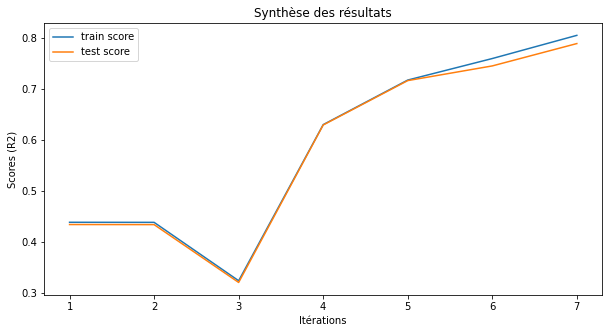

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,8,1), list_score_train, label="train score")
plt.plot(np.arange(1,8,1), list_score_test, label="test score")
plt.xlabel("Itérations")
plt.ylabel("Scores (R2)")
plt.legend()
plt.title("Synthèse des résultats");

#### Affichage de la progression des "metriques" MAE ==========

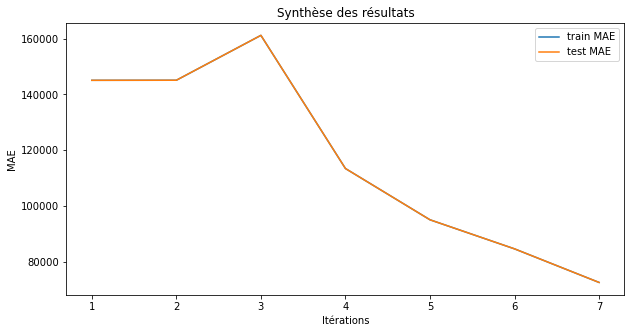

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,8,1), list_mae_train, label="train MAE")
plt.plot(np.arange(1,8,1), list_mae_test, label="test MAE")
plt.xlabel("Itérations")
plt.ylabel("MAE")
plt.legend()
plt.title("Synthèse des résultats");

#### Analyse détaillée des derniers résultats ==================

#### Reprenons la meilleur itération (pour le moment) et analysons plus en détails les résultats
#### Attention : Il faut également changer les sorties de la fonction d'eval Ridge !!!

In [ ]:
### Iteration 7 : dataset presque complet avec scaler std + poly ordre 3 + encodage dep ===

# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

col_qual = ['Maison', 'Appartement', 'terrains_a_batir',
            'dep_75','dep_77','dep_78','dep_91','dep_92','dep_93','dep_94','dep_95',
            'code_commune', 'section_cadastrale',
            'Dépendance', 'terrains_autre',
            'code_annee']

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_qual + col_quan

# Appel de la fonction d'eval Ridge

ridge_7, X_train, y_train_7, ridge_7_pred_train = eval_ridge(df2,col_cibl,col_util,True,True,3)

alpha : [0.1]

score (R2) train : 0.8043412523413288
score (R2) test : 0.78822738198303
MAE train : 72916.757617968
MAE test : 72916.757617968
Dimension du tab de coef. :  (1, 2024)


#### Affichage des écarts prédictions vs valeurs réelles =========

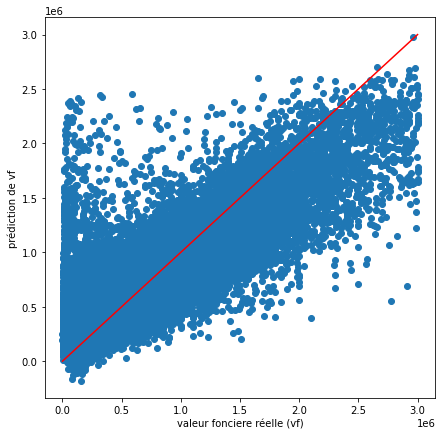

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_train_7, ridge_7_pred_train)
plt.plot((y_train_7.min(), y_train_7.max()), (y_train_7.min(), y_train_7.max()), color='r')
plt.xlabel("valeur fonciere réelle (vf)")
plt.ylabel("prédiction de vf");

#### Nota : nous sommes très loin de la droite y = x ! plus présence d'une forte dispension...
#### Nota : présence d'une valeur très très élevée dans les prédictions de test ??? (pas présente en train)

#### Résidus en fonction des valeurs réelles ==================

In [ ]:
residus = ridge_7_pred_train - y_train_7

In [ ]:
residus.describe()

,valeur_fonciere
count,2.904230e+05
mean,-5.263786e-06
std,1.284780e+05
min,-2.225896e+06
25%,-4.177316e+04
50%,1.249896e+03
75%,4.395102e+04
max,2.323445e+06


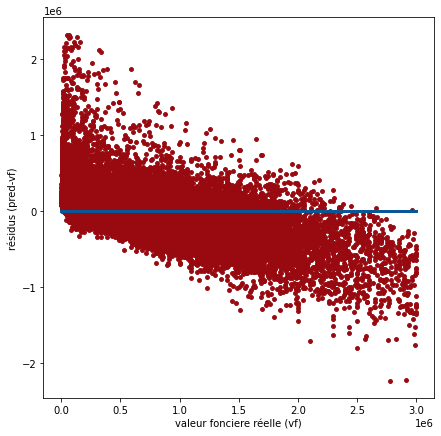

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_train_7, residus, color='#980a10', s=15)
plt.plot((y_train_7.min(), y_train_7.max()), (0, 0), lw=3, color='#0a5798')
plt.xlabel("valeur fonciere réelle (vf)")
plt.ylabel("résidus (pred-vf)");

#### Nota : pas de répartition homogène autour de la droite y = 0 !  mauvais signe... il y a une tendance décroissante..
#### Le modèle sur estime la vf pour les bas prix, sous estime la vf pour les hauts prix

In [ ]:
residus_norm = (residus-residus.mean())/residus.std()
#residus_norm['valeur_fonciere']

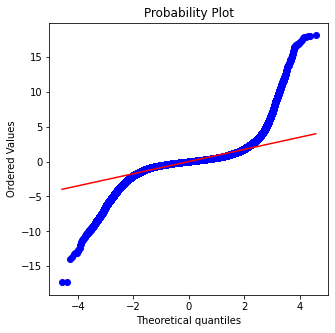

In [ ]:
import scipy.stats as stats                               # test loi Gaussienne (des résidus) + graph

plt.figure(figsize=(5, 5))
stats.probplot(residus_norm['valeur_fonciere'], plot=plt)
plt.show();

#### Nota : les pts ne sont pas du tout alignés sur la première bissectrice ! le modèle n'est pas très performant
#### et doit encore être amélioré...

#### Analyse de l'importance des différentes variables ==========

#### Pour disposer des coef. appliqués aux variables nous repartons de l'itération 2
#### Attention : on conserve le deuxième type de sorties de la fonction eval Ridge

alpha : [0.1]

score (R2) train : 0.43758843403405157
score (R2) test : 0.43313692100764556
MAE train : 145487.96665443675
MAE test : 145487.96665443675


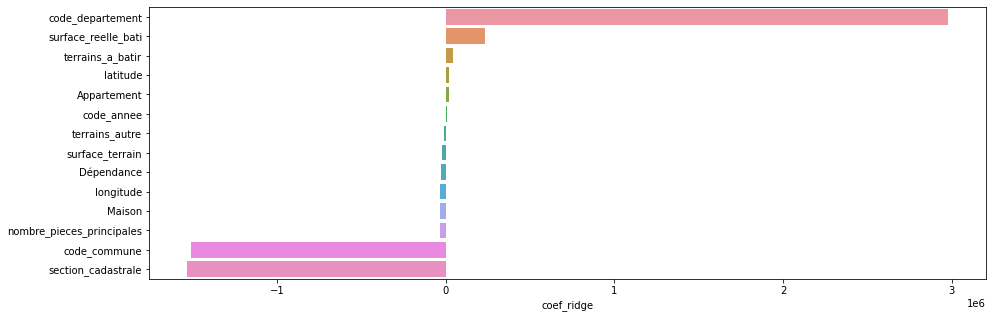

In [ ]:
### Iteration 2 : dataset presque complet avec scaler std ================================

# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

col_qual = ['Maison', 'Appartement', 'terrains_a_batir',
            'code_departement', 'code_commune', 'section_cadastrale',
            'Dépendance', 'terrains_autre',
            'code_annee']

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_qual + col_quan

# Appel de la fonction d'eval Ridge

ridge_2, X_train_2, y_train_2, ridge_2_pred_train = eval_ridge(df,col_cibl,col_util,True,False)

#### Nota : comme vu précédemment la localisation (par codes) est prépondérante...
#### Vérifions les dépendances de ces 3 var avec la valeur fonciere

#### Test sur le code departement

In [ ]:
# Variables Quantitatives et Qualitatives => ANOVA

#H0 : l'hypothèse selon laquelle la variable categorielle n'influe pas sur la variable numérique
#rejet de H0 veut dire qu'il y a une influence mais non déterminée (nota : pas de coef ici)

In [ ]:
import statsmodels.api

result = statsmodels.formula.api.ols('valeur_fonciere ~ code_departement', data = df).fit()
statsmodels.api.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
code_departement,7.0,5.596519e+15,7.995028e+14,11617.642769,0.0
Residual,363021.0,2.498237e+16,6.881799e+10,NaN,NaN


In [ ]:
# p-value <=> PR(>F) avec ANOVA

#Cas                                Test/Méthode  p-value    Décision           Quantifieur
#variable catégorielle et continue  ANOVA         < 5%       Pas indépendantes

#### Nota : PR(>F) = 0 donc < 5% => "le code departement a un effet statistique significatif sur la valeur fonciere" 

#### pour confirmation, test sur un département particulier après encodage...

In [ ]:
import statsmodels.api

result = statsmodels.formula.api.ols('valeur_fonciere ~ dep_75', data = df2).fit()
statsmodels.api.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
dep_75,1.0,3.821827e+15,3.821827e+15,51852.716804,0.0
Residual,363027.0,2.675707e+16,7.370544e+10,NaN,NaN


#### Nota : même conclusion... 

#### Pour voir, application du test de Pearson en considérant le code département comme var.  quantitative !

In [ ]:
from scipy.stats import pearsonr

pearsonr(df['valeur_fonciere'],df['code_departement'])

(-0.1873379239274596, 0.0)

#### Nota : dans cette hypothèse, le departement est faiblement lié à la valeur fonciere...
#### en tout cas, moins que la surface relle bati (vue plus bas)...

#### test sur le code commune

In [ ]:
#import statsmodels.api

result = statsmodels.formula.api.ols('valeur_fonciere ~ code_commune', data = df).fit()
statsmodels.api.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
code_commune,1272.0,9.131701e+15,7.179011e+12,121.090451,0.0
Residual,361756.0,2.144719e+16,5.928635e+10,NaN,NaN


#### Nota : même conclusion... 

#### et enfin test sur la section cadastrale

In [ ]:
#import statsmodels.api

result = statsmodels.formula.api.ols('valeur_fonciere ~ section_cadastrale', data = df).fit()
statsmodels.api.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
section_cadastrale,1.0,1.116569e+15,1.116569e+15,13758.073545,0.0
Residual,363027.0,2.946232e+16,8.115739e+10,NaN,NaN


#### Nota : même conclusion... 

#### Que se passe-t-il si on supprime ces 3 var du DataSet ?

alpha : [0.1]

score (R2) train : 0.3532680713238662
score (R2) test : 0.3501892674255237
MAE train : 158287.06095888084
MAE test : 158287.06095888084


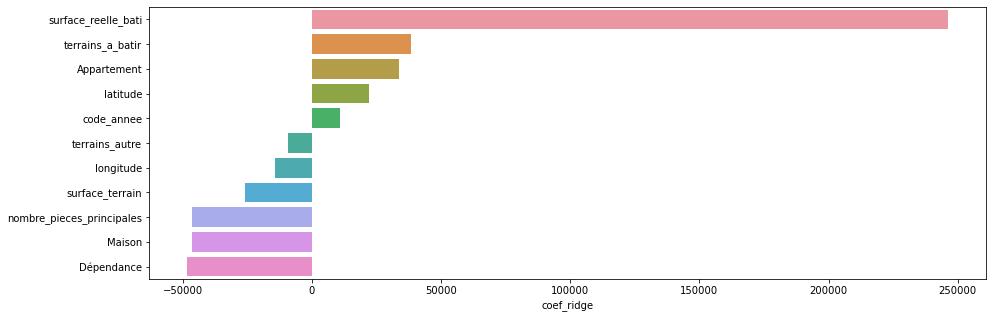

In [ ]:
### Iteration 2 bis : dataset réduit avec scaler std ===================================

# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

col_qual = ['Maison', 'Appartement', 'terrains_a_batir',
#            'code_departement', 'code_commune', 'section_cadastrale',
            'Dépendance', 'terrains_autre',
            'code_annee']

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_qual + col_quan

# Appel de la fonction d'eval Ridge

ridge_2, X_train_2, y_train_2, ridge_2_pred_train = eval_ridge(df,col_cibl,col_util,True,False)

#### Nota : la localisation par latitude/longitude ne prend pas le relai... c'est la surface reelle bati...
#### Ce qui était déjà visible dans le premier histogramme...
#### Si on ne conserve que lat/lon pour les données de localisation, le modèle est moins bon (test non conservé dans ce notebook).

#### Vérifions par test statistique la dépendance ou non de cette surface avec la valeur fonciere

In [ ]:
# Variables Quantitatives  => Pearson

#H0 : les variables sont indépendantes... si p-value < 5% alors on rejette H0 = les var ne sont pas indépendantes

#Test              p-value   Décision        Quantifieur
#Test de Pearson   < 5%      On rejette H0   coefficient de Pearson (-1,0,1)   -1 : x+,y-

In [ ]:
from scipy.stats import pearsonr

pearsonr(df['valeur_fonciere'],df['surface_reelle_bati'])

(0.4936092710408453, 0.0)

#### Nota : la p-value = 0 donc les variables ne sont pas indépendantes, elles sont moyennement dépendantes coef = 0,49

In [ ]:
# Autre analyse de la dépendance valeur_fonciere / surface_reelle_bati ---

# Importer la fonction f_regression, afficher la F-statistique et la p-value associée au test H0:  β1=0
# On pose l'hypothèse H0 suivante:  β1=0 (ce qui revient à dire que x et y sont indépendantes)

from sklearn.feature_selection import f_regression

print('F-statistique :', f_regression(df['surface_reelle_bati'].values.reshape(-1,1), df['valeur_fonciere'].values.reshape(-1,1))[0], 'p-value :', 
                         f_regression(df['surface_reelle_bati'].values.reshape(-1,1), df['valeur_fonciere'].values.reshape(-1,1))[1])



F-statistique : [116945.30644076] p-value : [0.]


#### Nota : même conclusion avec la fonction f_regression...
#### p-value = 0 donc la variable surface_reelle_bati est très significative.

#### Autre piste à explorer : séparer le dataset en 3 parties, une par type de bien ===

#### nous allons nous pencher uniquement sur les Appartements ===

In [ ]:
df6 = df2[df2['Appartement']==1]
df6.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_94,dep_95
1,2019-1135466,155000.0,2019-01-04,1.0,Vente,4.0,NaN,AV DE LA GARE,0600,77340.0,77373,Pontault-Combault,77,77373000AD0157,2,51.0,2.0,0.0,2.616840,48.805639,1,1,0,0,0,3039.22,773730000003,3804.018010,3759.720085,2019,0,Appartement,0,1,0,0,0,0,0,0
2,2019-1135467,165500.0,2019-01-09,1.0,Vente,45.0,NaN,RUE LOUIS VICTOR DE BROGLIE,1413,77176.0,77445,Savigny-le-Temple,77,77445000YA0444,3,64.0,3.0,12.0,2.565832,48.605740,1,2,0,0,0,2585.94,774450002400,2821.665116,2610.471778,2019,0,Appartement,0,1,0,0,0,0,0,0
6,2019-1135473,205000.0,2019-01-03,1.0,Vente en l'état futur d'achèvement,NaN,NaN,RTE DE MANDRES,0325,77170.0,77053,Brie-Comte-Robert,77,77053000AC0177,4,60.0,3.0,0.0,2.597798,48.692342,1,2,0,0,0,3416.67,770530000002,3198.825000,3284.329226,2019,0,Appartement,0,1,0,0,0,0,0,0
8,2019-1135475,156000.0,2019-01-09,1.0,Vente,18.0,NaN,BD DUBURCQ,0320,77220.0,77470,Tournan-en-Brie,77,77470000AB0044,1,45.0,2.0,0.0,2.757263,48.740774,1,0,0,0,0,3466.67,774700000001,3432.990714,3640.260357,2019,0,Appartement,0,1,0,0,0,0,0,0
9,2019-1135476,200000.0,2019-01-14,1.0,Vente,15.0,NaN,RUE DU CHATEAU,0100,77310.0,77040,Boissise-le-Roi,77,77040000AI0134,3,94.0,4.0,0.0,2.572895,48.528195,1,2,0,0,0,2127.66,770400000008,2548.859286,1901.666489,2019,0,Appartement,0,1,0,0,0,0,0,0


In [ ]:
df6.shape

(255728, 40)

#### Nota : nous avons toujours un nombre significatif de lignes dans le Dataset...
#### Comme précédemment, nous repartons de la meilleure itération (N7)
#### Attention, il faut ré-activer le premier type de sortie de la fonction eval Ridge

#### Iteration 9 : dataset presque complet avec scaler std + poly ordre 3 + encodage dep ===

In [ ]:
# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

col_qual = [
#            'Maison', 'Appartement', 'terrains_a_batir',
            'dep_75','dep_77','dep_78','dep_91','dep_92','dep_93','dep_94','dep_95',
            'code_commune', 'section_cadastrale',
            'Dépendance', 'terrains_autre',
            'code_annee']

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_qual + col_quan

# Appel de la fonction d'eval Ridge

ridge_9a, score_train, score_test, mae_train, mae_test = eval_ridge(df6,col_cibl,col_util,True,True,3)

alpha : [0.1]

score (R2) train : 0.8287287918615518
score (R2) test : 0.8176741230607816
MAE train : 69407.95660962931
MAE test : 69407.95660962931
Dimension du tab de coef. :  (1, 1330)


#### Nota : le résultat est meilleur lorsque l'on ne considère qu'un seul type de bien...
#### Voyons si cela se confirme aussi pour les maisons et les terrains à batir :

#### Analyse des "Maisons" ===

In [ ]:
df7 = df2[df2['Maison']==1]
df7.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_94,dep_95
0,2019-1135463,310000.0,2019-01-03,1.0,Vente,11.0,NaN,RUE DE LA FONTAINE,0650,77220.0,77215,Gretz-Armainvilliers,77,772150000B0473,0,101.0,4.0,855.0,2.740574,48.739669,0,0,1,0,1,3069.31,772150000001,3646.883495,3474.511880,2019,0,Maison,0,1,0,0,0,0,0,0
3,2019-1135468,269000.0,2019-01-02,1.0,Vente,6.0,NaN,RUE JEAN FERRAT,0492,77310.0,77407,Saint-Fargeau-Ponthierry,77,77407000AY0353,0,84.0,4.0,270.0,2.553743,48.530118,0,0,1,0,2,3202.38,774070000024,2815.332174,2679.428891,2019,0,Maison,0,1,0,0,0,0,0,0
4,2019-1135469,199500.0,2019-01-08,1.0,Vente,3.0,NaN,RUE DE LA PICARDIE,0186,77720.0,77211,Grandpuits-Bailly-Carrois,77,772110170D0147,0,109.0,5.0,1036.0,2.993174,48.576719,0,0,1,0,2,1830.28,772110170003,2360.692500,2020.605714,2019,0,Maison,0,1,0,0,0,0,0,0
5,2019-1135471,287000.0,2019-01-03,1.0,Vente,9.0,NaN,RUE LAFAYETTE,0726,77340.0,77373,Pontault-Combault,77,77373000AH0274,0,89.0,4.0,166.0,2.615606,48.794421,0,0,1,0,0,3224.72,773730000007,3475.624138,3759.720085,2019,0,Maison,0,1,0,0,0,0,0,0
7,2019-1135474,143000.0,2019-01-02,1.0,Vente,2.0,NaN,RUE TOURNERIE,0380,77830.0,77354,Pamfou,77,773540000C0910,0,58.0,4.0,406.0,2.870231,48.460138,0,0,1,0,1,2465.52,773540000002,2184.890000,1980.750870,2019,0,Maison,0,1,0,0,0,0,0,0


In [ ]:
df7.shape

(100020, 40)

#### Iteration 9 : dataset presque complet avec scaler std + poly ordre 3 + encodage dep ===

In [ ]:
# Appel de la fonction d'eval Ridge

ridge_9m, score_train, score_test, mae_train, mae_test = eval_ridge(df6,col_cibl,col_util,True,True,3)

alpha : [0.1]

score (R2) train : 0.8287287918615518
score (R2) test : 0.8176741230607816
MAE train : 69407.95660962931
MAE test : 69407.95660962931
Dimension du tab de coef. :  (1, 1330)


#### Nota : même constat pour les maisons... malgré un nb de lignes 2,5 fois moindre...

#### Analyse des Terrains à bâtir ===

In [ ]:
df8 = df2[df2['terrains_a_batir']==1]
df8.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_94,dep_95
36,2019-1135512,257000.0,2019-01-10,1.0,Vente en l'état futur d'achèvement,NaN,NaN,LA SORTIE DE GUIGNES,B025,77390.0,77222,Guignes,77,77222000AH0297,0,0.0,0.0,199.0,2.806298,48.628694,0,0,0,1,0,1291.46,772220000007,1899.616667,2502.219171,2019,0,Terrain,0,1,0,0,0,0,0,0
80,2019-1135568,110000.0,2019-01-08,1.0,Vente terrain à bâtir,NaN,NaN,L ORME BRISE,B016,77310.0,77378,Pringy,77,77378000AD0220,0,0.0,0.0,184.0,2.564561,48.521392,0,0,0,1,0,597.83,773780000003,1590.790000,2555.558593,2019,0,Terrain,0,1,0,0,0,0,0,0
115,2019-1135616,183000.0,2019-01-09,1.0,Vente,54.0,NaN,AV VICTOR HUGO,0646,77170.0,77053,Brie-Comte-Robert,77,77053000AV0166,0,0.0,0.0,367.0,2.608611,48.682525,0,0,0,1,0,498.64,770530000021,3041.706087,3284.329226,2019,0,Terrain,0,1,0,0,0,0,0,0
143,2019-1135650,187000.0,2019-01-21,1.0,Vente,NaN,NaN,AV LAFAYETTE,0580,77680.0,77390,Roissy-en-Brie,77,773900000D2584,0,0.0,0.0,445.0,2.660324,48.791354,0,0,0,1,0,420.22,773900000003,3699.563373,3292.155286,2019,0,Terrain,0,1,0,0,0,0,0,0
180,2019-1135698,92000.0,2019-01-21,1.0,Vente terrain à bâtir,NaN,NaN,MACHAULT,B044,77133.0,77266,Machault,77,772660000F0966,0,0.0,0.0,351.0,2.828720,48.454006,0,0,0,1,0,262.11,772660000005,1474.870000,1923.614643,2019,0,Terrain,0,1,0,0,0,0,0,0


In [ ]:
df8.shape

(7281, 40)

#### Iteration 9 : dataset presque complet avec scaler std + poly ordre 3 + encodage dep ===

In [ ]:
# Appel de la fonction d'eval Ridge

ridge_9t, score_train, score_test, mae_train, mae_test = eval_ridge(df6,col_cibl,col_util,True,True,3)

alpha : [0.1]

score (R2) train : 0.8287287918615518
score (R2) test : 0.8176741230607816
MAE train : 69407.95660962931
MAE test : 69407.95660962931
Dimension du tab de coef. :  (1, 1330)


#### Nota : même résultat, avec encore une fois, un nb de lignes très toujours plus réduit...

#### Nota : à l'inverse, la sélection de tous les types de biens sur un seul département dégrade le résultat.

#### Poursuite de l'étude d'impact de l'encodage ==============

#### Cette fois-ci nous encodons les 3 variables de localisation (codes)

In [ ]:
# Encodage du code_departement + code_commune + section_cadastrale

df['code_departement'] = df['code_departement'].astype('object')
df['code_commune'] = df['code_commune'].astype('object')
df['section_cadastrale'] = df['section_cadastrale'].astype('object')
df4 = df.join(pd.get_dummies(df[['code_departement','code_commune', 'section_cadastrale']], 
                             prefix=['dep','com', 'sec']).astype('int'))
df4.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_94,dep_95,com_75101,com_75102,com_75103,com_75104,com_75105,com_75106,com_75107,com_75108,com_75109,com_75110,com_75111,com_75112,com_75113,com_75114,com_75115,com_75116,com_75117,com_75118,com_75119,com_75120,com_77001,com_77002,com_77003,com_77004,com_77005,com_77006,com_77007,com_77008,com_77009,com_77010,com_77011,com_77012,com_77013,com_77014,com_77015,com_77016,com_77018,com_77019,com_77020,com_77021,com_77022,com_77023,com_77024,com_77025,com_77026,com_77027,com_77029,com_77030,com_77031,com_77032,com_77034,com_77035,com_77036,com_77037,com_77038,com_77039,com_77040,com_77041,com_77042,com_77043,com_77044,com_77045,com_77046,com_77047,com_77048,com_77049,com_77050,com_77051,com_77052,com_77053,com_77054,com_77055,com_77056,com_77057,com_77058,com_77059,com_77060,com_77061,com_77062,com_77063,com_77065,com_77066,com_77067,com_77068,com_77069,com_77070,com_77071,com_77072,com_77073,com_77075,com_77076,com_77077,com_77078,com_77079,com_77080,com_77081,com_77082,com_77083,com_77084,com_77085,com_77086,com_77087,com_77088,com_77089,com_77090,com_77091,com_77093,com_77094,com_77095,com_77096,com_77097,com_77098,com_77099,com_77100,com_77101,com_77102,com_77103,com_77104,com_77106,com_77107,com_77108,com_77109,com_77110,com_77111,com_77112,com_77113,com_77114,com_77115,com_77116,com_77117,com_77118,com_77119,com_77120,com_77121,com_77122,com_77123,com_77124,com_77125,com_77126,com_77127,com_77128,com_77129,com_77130,com_77131,com_77132,com_77133,com_77134,com_77135,com_77136,com_77137,com_77138,com_77139,com_77140,com_77141,com_77142,com_77143,com_77144,com_77145,com_77146,com_77147,com_77148,com_77150,com_77151,com_77152,com_77153,com_77154,com_77155,com_77156,com_77157,com_77158,com_77159,com_77161,com_77162,com_77163,com_77164,com_77165,com_77167,com_77168,com_77169,com_77171,com_77172,com_77173,com_77174,com_77175,com_77176,com_77177,com_77178,com_77179,com_77180,com_77181,com_77182,com_77183,com_77184,com_77185,com_77186,com_77187,com_77188,com_77190,com_77191,com_77192,com_77193,com_77194,com_77195,com_77196,com_77197,com_77198,com_77199,com_77200,com_77201,com_77202,com_77203,com_77204,com_77205,com_77206,com_77207,com_77208,com_77209,com_77210,com_77211,com_77212,com_77214,com_77215,com_77216,com_77217,com_77218,com_77219,com_77220,com_77221,com_77222,com_77223,com_77224,com_77225,com_77226,com_77227,com_77228,com_77229,com_77230,com_77231,com_77232,com_77233,com_77234,com_77235,com_77236,com_77237,com_77238,com_77239,com_77240,com_77241,com_77242,com_77243,com_77244,com_77245,com_77246,com_77247,com_77248,com_77249,com_77251,com_77252,com_77253,com_77254,com_77255,com_77256,com_77257,com_77258,com_77259,com_77260,com_77261,com_77262,com_77263,com_77264,com_77265,com_77266,com_77267,com_77268,com_77269,com_77270,com_77271,com_77272,com_77273,com_77274,com_77275,com_77276,com_77277,com_77278,com_77279,com_77280,com_77281,com_77282,com_77283,com_77284,com_77285,com_77286,com_77287,com_77288,com_77289,com_77290,com_77291,com_77292,com_77293,com_77294,com_77295,com_77296,com_77297,com_77298,com_77300,com_77301,com_77302,com_77303,com_77305,com_77306,com_77307,com_77308,com_77309,com_77310,com_77311,com_77312,com_77313,com_77314,com_77315,com_77316,com_77317,com_77318,com_77319,com_77320,com_77321,com_77322,com_77323,com_77325,com_77326,com_77327,com_77328,com_77329,com_77330,com_77331,com_77332,com_77333,com_77335,com_77336,com_77337,com_77338,com_77339,com_77340,com_77341,com_77342,com_77343,com_77344,com_77345,com_77347,com_77348,com_7

In [ ]:
df4.shape

(363029, 12121)

In [ ]:
# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

col_tmp = df4.columns
col_tmp = col_tmp.drop(col_cibl)
col_tmp = col_tmp.drop(col_quan)
col_tmp = col_tmp.drop(['id_mutation','date_mutation','numero_disposition',
                        'nature_mutation','adresse_numero','adresse_suffixe',
                        'adresse_nom_voie','adresse_code_voie','code_postal',
                        'code_commune','nom_commune','code_departement','id_parcelle',
                        'annee','type_bien','nombre_lots',
                        'prix_m²','prix_m²_moy_ca','prix_m²_moy_co',
                        'section_cadastrale'])
col_qual = list(col_tmp)

col_quan = ['surface_reelle_bati', 'nombre_pieces_principales', 
            'latitude', 'longitude',
            'surface_terrain']

col_util = col_cibl + col_quan + col_qual

#### Nota : le nombre de variables dans le dataset devient vraiment trop important (12 121 colonnes !)
#### Nous allons devoir passer par une étape de réduction de dimensions pour être en capacité de poursuivre

#### Features selection pré-étude ==========================

#### Test de SelectKBest 

In [ ]:
# Import des modules nécessaires

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# Initialisation
sk = SelectKBest(f_regression, k=121)                               # soit 1% du nbr de colonnes !!!

# Séparation des variables explicatibles et de la variable cible

# La variable cible
target = df4[col_cibl]
# Selection des colonnes utiles
data = df4[col_util]
# Suppression de la variable cible
data.drop(col_cibl, axis=1, inplace=True)

In [ ]:
# Entrainement avec nos données encodées
sk.fit(X=data, y=target)

# Colonnes sélectionnées
data.columns[sk.get_support()]

Index(['surface_reelle_bati', 'nombre_pieces_principales', 'latitude',
       'longitude', 'surface_terrain', 'Appartement', 'Dépendance', 'Maison',
       'terrains_a_batir', 'dep_75',
       ...
       'sec_751170000110', 'sec_751170000112', 'sec_751170000113',
       'sec_751170000118', 'sec_920510000001', 'sec_920510000004',
       'sec_920510000013', 'sec_920510000015', 'sec_920510000017',
       'sec_920510000019'],
      dtype='object', length=121)

In [ ]:
col_data4 = list(data.columns[sk.get_support()])
col_data4[0:10]

['surface_reelle_bati',
 'nombre_pieces_principales',
 'latitude',
 'longitude',
 'surface_terrain',
 'Appartement',
 'Dépendance',
 'Maison',
 'terrains_a_batir',
 'dep_75']

In [ ]:
data4 = df4[col_data4]
data4.head()

,surface_reelle_bati,nombre_pieces_principales,latitude,longitude,surface_terrain,Appartement,Dépendance,Maison,terrains_a_batir,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_95,com_75101,com_75102,com_75103,com_75104,com_75105,com_75106,com_75107,com_75108,com_75109,com_75110,com_75111,com_75112,com_75113,com_75114,com_75115,com_75116,com_75117,com_75118,com_77284,com_77288,com_78361,com_78646,com_91174,com_91223,com_91228,com_91521,com_92012,com_92040,com_92044,com_92051,com_92064,com_93001,com_93029,com_93031,com_93046,com_93066,com_93071,com_94067,com_94080,com_95018,com_95127,com_95252,sec_751050000114,sec_751060000021,sec_751060000022,sec_751060000106,sec_751060000107,sec_751070000002,sec_751070000003,sec_751070000005,sec_751070000013,sec_751070000023,sec_751070000114,sec_751070000208,sec_751070000212,sec_751080000013,sec_751080000023,sec_751090000001,sec_751150000222,sec_751150000304,sec_751160000113,sec_751160000118,sec_751160000119,sec_751160000122,sec_751160000205,sec_751160000206,sec_751160000207,sec_751160000208,sec_751160000210,sec_751160000212,sec_751160000306,sec_751160000307,sec_751160000308,sec_751160000312,sec_751160000313,sec_751160000314,sec_751160000315,sec_751160000318,sec_751160000320,sec_751160000322,sec_751160000323,sec_751160000400,sec_751160000401,sec_751160000402,sec_751160000403,sec_751160000418,sec_751160000419,sec_751160000422,sec_751160000500,sec_751160000502,sec_751160000513,sec_751170000013,sec_751170000106,sec_751170000108,sec_751170000109,sec_751170000110,sec_751170000112,sec_751170000113,sec_751170000118,sec_920510000001,sec_920510000004,sec_920510000013,sec_920510000015,sec_920510000017,sec_920510000019
0,101.0,4.0,48.739669,2.740574,855.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51.0,2.0,48.805639,2.616840,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,64.0,3.0,48.605740,2.565832,12.0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84.0,4.0,48.530118,2.553743,270.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,109.0,5.0,48.576719,2.993174,1036.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Reconstruction d'un DataFrame avant appel de la fonction d'eval

df5 = target.join(data4)
df5.head()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,latitude,longitude,surface_terrain,Appartement,Dépendance,Maison,terrains_a_batir,dep_75,dep_77,dep_78,dep_91,dep_92,dep_93,dep_95,com_75101,com_75102,com_75103,com_75104,com_75105,com_75106,com_75107,com_75108,com_75109,com_75110,com_75111,com_75112,com_75113,com_75114,com_75115,com_75116,com_75117,com_75118,com_77284,com_77288,com_78361,com_78646,com_91174,com_91223,com_91228,com_91521,com_92012,com_92040,com_92044,com_92051,com_92064,com_93001,com_93029,com_93031,com_93046,com_93066,com_93071,com_94067,com_94080,com_95018,com_95127,com_95252,sec_751050000114,sec_751060000021,sec_751060000022,sec_751060000106,sec_751060000107,sec_751070000002,sec_751070000003,sec_751070000005,sec_751070000013,sec_751070000023,sec_751070000114,sec_751070000208,sec_751070000212,sec_751080000013,sec_751080000023,sec_751090000001,sec_751150000222,sec_751150000304,sec_751160000113,sec_751160000118,sec_751160000119,sec_751160000122,sec_751160000205,sec_751160000206,sec_751160000207,sec_751160000208,sec_751160000210,sec_751160000212,sec_751160000306,sec_751160000307,sec_751160000308,sec_751160000312,sec_751160000313,sec_751160000314,sec_751160000315,sec_751160000318,sec_751160000320,sec_751160000322,sec_751160000323,sec_751160000400,sec_751160000401,sec_751160000402,sec_751160000403,sec_751160000418,sec_751160000419,sec_751160000422,sec_751160000500,sec_751160000502,sec_751160000513,sec_751170000013,sec_751170000106,sec_751170000108,sec_751170000109,sec_751170000110,sec_751170000112,sec_751170000113,sec_751170000118,sec_920510000001,sec_920510000004,sec_920510000013,sec_920510000015,sec_920510000017,sec_920510000019
0,310000.0,101.0,4.0,48.739669,2.740574,855.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,155000.0,51.0,2.0,48.805639,2.616840,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,165500.0,64.0,3.0,48.605740,2.565832,12.0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,269000.0,84.0,4.0,48.530118,2.553743,270.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,199500.0,109.0,5.0,48.576719,2.993174,1036.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### On rejoue l'itération 8 mais avec la section encodée également et un scaler poly d'ordre 2 ald 3

#### Iteration 8 bis: dataset presque complet avec scaler std + poly ordre 2 + encodage dep & com & sec ===

In [ ]:
# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

col_util = df5.columns

# Appel de la fonction d'eval Ridge

ridge_8b, score_train, score_test, mae_train, mae_test = eval_ridge(df5,col_cibl,col_util,True,True,2)

alpha : [0.1]

score (R2) train : 0.8037564110010259
score (R2) test : 0.7916933817808136
MAE train : 74901.52364028928
MAE test : 74901.52364028928
Dimension du tab de coef. :  (1, 7503)


#### Nota : avec seulement 1% du nb total de colonnes et un scaler polynomial d'ordre 2
#### nous retrouvons un score proche de l'itération 7 qui n'encodait que le département et qui était à l'ordre 3

#### Restriction aux seuls Appartements ===

In [ ]:
df5a = df5[df5['Appartement']==1]

In [ ]:
df5a.shape

(255728, 122)

#### Iteration 8 ter: dataset presque complet avec scaler std + poly ordre 2 + encodage dep & com & sec ===

In [ ]:
# Sélection des colonnes =================================

# col = df.columns

col_cibl = ['valeur_fonciere']

col_util = df5a.columns

# Appel de la fonction d'eval Ridge

ridge_8t, score_train, score_test, mae_train, mae_test = eval_ridge(df5a,col_cibl,col_util,True,True,2)

alpha : [0.1]

score (R2) train : 0.839089634144011
score (R2) test : 0.8238649633662695
MAE train : 69229.13559404976
MAE test : 69229.13559404976
Dimension du tab de coef. :  (1, 7503)


#### Nota : meilleur score obtenu à ce stade...
#### la MAE reste élevée pour une réelle exploitation...

#### Synthèse des résultats de l'étude du modèle Ridge et Orientation pour une éventuelle poursuite des travaux

### Synthèse :
#### les 7 premières itérations menées ont permis de faire progresser le score de 0,43 à 0,80. La MAE reste toujours importante.
#### On voit ici l'importance de la standardisation avant l'application de tout autre type d'algorithme.
#### La normalisation polynomiale et l'encodage ont permis de faire progresser le score.
#### L'étude détaillée des résultats nous montre que le modèle n'est pas encore suffisamment performant.
#### Le découpage du DataSet en fonction du type de bien permet également une légère amélioration du score (0,828).
#### Enfin, l'encodage de 3 variables de localisation associé à une réduction de dimension et la sélection d'un type de bien
####  ont permis d'obtenir le meilleur résultat (0,839).

### Orientation :
#### Pour aller encore plus loin avec le modèle Ridge, il faudrait tester d'autres features selections ou réductions de dimension
####    afin de profiter pleinement de l'encodage des variables de localisation sans trop dégrader le modèle.
#### L'objectif est toujours de s'appuyer sur ces données afin de remplacer le prix au m2, base essentielle de l'évaluation de 
####    la valeur foncière.
#### Il faudra probablement enterriner le fait d'organiser la solution autour de 3 Datasets et 3 Modèles (1 par type de bien)